In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt


In [2]:
data_113 = np.loadtxt('dataset/20151026_113_labeled')
data_114 = np.loadtxt('dataset/20151026_114_labeled')
data = np.concatenate((data_113, data_114), axis=0)
features = data[:, :2]
labels = data[:, 6].astype(np.int8)

In [3]:
class KNN:
    def __init__(self, features: npt.NDArray[np.float64], labels: npt.NDArray[np.int8], k: int):
        # Normalize features
        self.mean = np.mean(features, axis=0)
        self.std = np.std(features, axis=0)
        self.features = (features - self.mean) / self.std
        self.labels = labels
        self.k = k

        # Calculate the weight of each label
        label_counts = np.unique(labels, return_counts=True)[1]
        # Weight = total number of data / number of data of each label
        self.label_weights =  labels.shape[0] / label_counts

    def predict(self, x: npt.NDArray[np.float64]) -> int:
        # Normalize the input
        x = (x - self.mean) / self.std

        # Calculate the Euclidean distance between the input and all the data
        distances = np.array([np.sum((x - feature) ** 2)
                              for feature in self.features])

        # Exclude the data that are too far from the input
        mask = distances < np.max(distances) / 5
        distances = distances[mask]
        labels = self.labels[mask]

        # Sort the data according to their distance to the point
        nearest = np.argsort(distances)

        # Take the nearest k neighbors
        k_nearest_labels = labels[nearest[:self.k]]

        # Count the number of each label
        k_nearest_counts = np.bincount(k_nearest_labels).astype(np.float64)

        # Add weight for each label
        for i in range(len(k_nearest_counts)):
            k_nearest_counts[i] *= self.label_weights[i]

        # Return the most frequent label
        return np.argmax(k_nearest_counts)

In [4]:
knn = KNN(features, labels, 3)
x1 = range(0, 500, 10)
x2 = range(0, 500, 10)
x = np.array([[i, j] for i in x1 for j in x2])
predictions = np.array([knn.predict(i) for i in x])
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

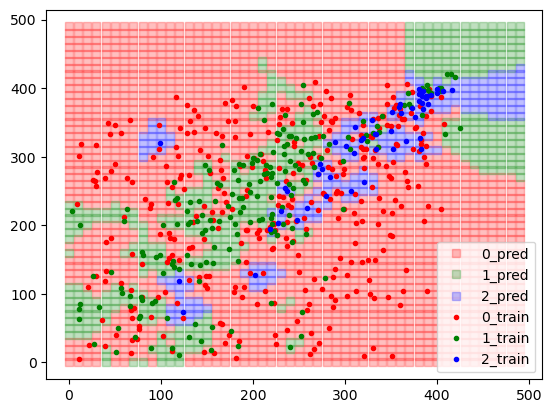

In [5]:
plt.plot(x[predictions == 0, 0], x[predictions == 0, 1], 'rs', alpha=0.25)
plt.plot(x[predictions == 1, 0], x[predictions == 1, 1], 'gs', alpha=0.25)
plt.plot(x[predictions == 2, 0], x[predictions == 2, 1], 'bs', alpha=0.25)
plt.plot(features[labels == 0, 0], features[labels == 0, 1], 'r.')
plt.plot(features[labels == 1, 0], features[labels == 1, 1], 'g.')
plt.plot(features[labels == 2, 0], features[labels == 2, 1], 'b.')
plt.legend(('0_pred', '1_pred', '2_pred', '0_train', '1_train', '2_train'))
plt.show()